In [1]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import plotly.graph_objects as go
import plotly.express as xp

In [3]:
trump =  pd.read_csv('Trumpall2.csv')
biden = pd.read_csv('Bidenall2.csv')

In [5]:
trump.head()

,user,text
0,manny_rosen,@sanofi please tell us how many shares the Cr...
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P..."
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...
4,James09254677,After 4 years you think you would have figure...


# Systiment Analysis

##### If Polarity > 0 then it is a Positive comment
##### If Polarity = 0 then it is a nutral comment
##### If Polarity < 0 then it is a Negative comment

In [11]:
TextBlob(trump['text'][99]).sentiment

Sentiment(polarity=-0.5, subjectivity=1.0)

In [14]:
def find_polarity(review):
    return TextBlob(review).sentiment.polarity

In [16]:
trump['Sentiment_Polarity'] = trump['text'].apply(find_polarity)

In [18]:
biden['Sentiment_Polarity'] = biden['text'].apply(find_polarity)

# Set the 'Positive, Negative and Neutral' key

In [22]:
trump['Expression_Level'] = np.where(trump['Sentiment_Polarity']>0, 'Positive', 'Negative')

In [24]:
trump['Expression_Level'][trump['Sentiment_Polarity']==0] = 'Neutral'

/var/folders/44/c9g5b6c105n7yf1cf62hd1400000gn/T/ipykernel_1475/2507829841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump['Expression_Level'][trump['Sentiment_Polarity']==0] = 'Neutral'


In [26]:
biden['Expression_Level'] = np.where(biden['Sentiment_Polarity']>0, 'Positive', 'Negative')
biden['Expression_Level'][biden['Sentiment_Polarity']==0] = 'Neutral'

/var/folders/44/c9g5b6c105n7yf1cf62hd1400000gn/T/ipykernel_1475/1231937222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden['Expression_Level'][biden['Sentiment_Polarity']==0] = 'Neutral'



# Drop all the tweets with neutral polarity

In [31]:
n_trump = trump[trump['Sentiment_Polarity']==0.000]

In [33]:
dropColsTrump = trump['Sentiment_Polarity'].isin(n_trump['Sentiment_Polarity'])
trump.drop(trump[dropColsTrump].index, inplace=True)

In [36]:
n_biden = biden[biden['Sentiment_Polarity']==0.000]
dropColsBiden = biden['Sentiment_Polarity'].isin(n_biden['Sentiment_Polarity'])
biden.drop(biden[dropColsBiden].index, inplace=True)

# Balance both the datasets

In [43]:
# Trump dataset has 324 extra data, So remove it using random
np.random.seed(10)
amount = 324
drop_indices = np.random.choice(trump.index, amount, replace=False)
df_subset_trump = trump.drop(drop_indices)
print(df_subset_trump.shape)

(1000, 4)


In [45]:
# Biden dataset has 31 extra data, So remove it using random
np.random.seed(10)
amount = 31
drop_indices2 = np.random.choice(biden.index, amount, replace=False)
df_subset_biden = biden.drop(drop_indices2)
df_subset_biden.shape

(1000, 4)

# Perdict the US Elections, by analyzing the number of positive and negative sentiments in both the accounts

In [100]:
count1 = df_subset_biden.groupby('Expression_Level').count()
neg_per1 = (count1['Sentiment_Polarity'][0]/1000) * 100
pos_per1 = (count1['Sentiment_Polarity'][1]/1000) * 100

In [102]:
count2 = df_subset_trump.groupby('Expression_Level').count()
neg_per2 = (count2['Sentiment_Polarity'][0]/1000) * 100
pos_per2 = (count2['Sentiment_Polarity'][1]/1000) * 100

In [106]:
politicians = ['Biden', 'Trump']

list_pos = [pos_per1, pos_per2]
list_neg = [neg_per1, neg_per2]

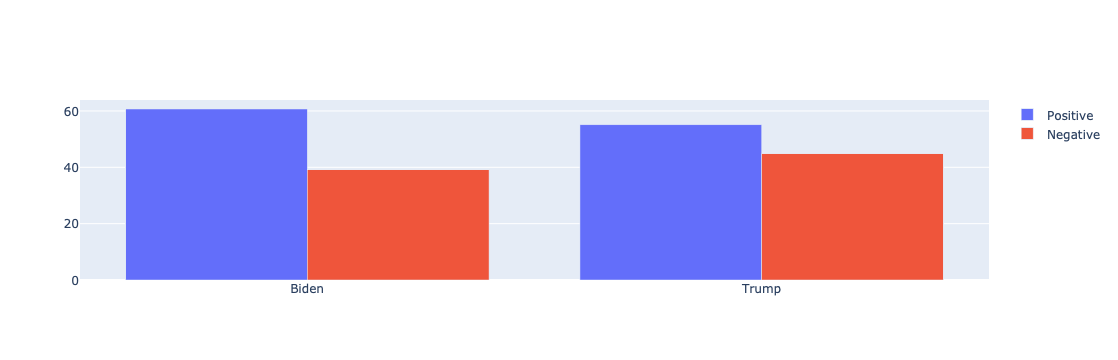

In [108]:
fig = go.Figure(
    data = [
        go.Bar(name='Positive', x=politicians, y=list_pos),
        go.Bar(name='Negative', x=politicians, y=list_neg)
    ]
)
fig.update_layout(barmode='group')
fig.show()